In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager,rc

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

from collections import Counter
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

In [11]:
review2020 = pd.read_csv("E:/Kaggle_Practice/BaeMin/review2020.csv")
review2021 = pd.read_csv("E:/Kaggle_Practice/BaeMin/review2021.csv")
review2020 = review2020.drop(columns=['Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20',
                                     'Unnamed: 21','Unnamed: 22','Unnamed: 23'])
review = pd.concat([review2020,review2021], ignore_index=True)
review.shape

(1198, 11)

In [3]:
review.head()

,날짜,닉네임,별점(1~5),"배달평가(좋다,아쉽다)",주문메뉴1,주문메뉴2,주문메뉴3,주문메뉴4,사진1,사진2,리뷰
0,2020,ssuw****,5,NaN,애넘 밀크티,NaN,NaN,NaN,25306131_190930004223160145_1_b.jpg,NaN,임신했을 때 자주 가서 사 마셨는데 어느 날 가게가 문 닫은거 같아 아쉬웠어요. 배...
1,2020,salut0506,4,NaN,마약크로플 + 로또딸기요거트 + 미니크로플,NaN,NaN,NaN,NaN,NaN,크로플 맛있는데 원래 빨대는 같이 안오나요?
2,2020,배미니,5,NaN,녹차 밀크티,쿠키앤크림,마약 크로플,NaN,31346867_200721006886174226_1_b.jpg,NaN,처음 먹어보는데 정말 맛있었어요!! 특히 크로플은 만드는 곳마다 조금 부담스러운 맛...
3,2020,gia0****,5,NaN,마약 크로플,애넘 밀크티,오키나와 스무디,NaN,NaN,NaN,NaN
4,2020,바라,5,NaN,수제 티라미수,징징이스무디,애넘 밀크티,NaN,29157484_190115009764170557_1_b.jpg,29157485_190115009764170557_2_b.jpg,"징징이 스무디 처음 마셔봤어요, 색이 너무 예뻐요. 몽실몽실 달콤한 피스타치오 아이..."


In [15]:
review = review.dropna(subset=['리뷰'])
review.head()

,날짜,닉네임,별점(1~5),"배달평가(좋다,아쉽다)",주문메뉴1,주문메뉴2,주문메뉴3,주문메뉴4,사진1,사진2,리뷰
0,2020,ssuw****,5,NaN,애넘 밀크티,NaN,NaN,NaN,25306131_190930004223160145_1_b.jpg,NaN,임신했을 때 자주 가서 사 마셨는데 어느 날 가게가 문 닫은거 같아 아쉬웠어요. 배...
1,2020,salut0506,4,NaN,마약크로플 + 로또딸기요거트 + 미니크로플,NaN,NaN,NaN,NaN,NaN,크로플 맛있는데 원래 빨대는 같이 안오나요?
2,2020,배미니,5,NaN,녹차 밀크티,쿠키앤크림,마약 크로플,NaN,31346867_200721006886174226_1_b.jpg,NaN,처음 먹어보는데 정말 맛있었어요!! 특히 크로플은 만드는 곳마다 조금 부담스러운 맛...
4,2020,바라,5,NaN,수제 티라미수,징징이스무디,애넘 밀크티,NaN,29157484_190115009764170557_1_b.jpg,29157485_190115009764170557_2_b.jpg,"징징이 스무디 처음 마셔봤어요, 색이 너무 예뻐요. 몽실몽실 달콤한 피스타치오 아이..."
5,2020,박은석,5,NaN,애넘 밀크티,마약 크로플,NaN,NaN,18417158_171014007261140656_1_b.jpg,18417159_171014007261140656_2_b.jpg,밀크티 맛있어요! 우유 먹으면 배아파서 자주 못먹었는데 락토프리 변경 가능하다니.....


In [16]:
review.shape

(1082, 11)

In [18]:
review_content=[]

for i in review['리뷰']:
    review_content.append(i)

review_content

['임신했을 때 자주 가서 사 마셨는데 어느 날 가게가 문 닫은거 같아 아쉬웠어요. 배민에서 발견하고 가을에 주문해 마셨는데 배민에 계신단거 한동안 또 까먹다가 오늘 갑자기 생각나서 오픈 기다리다가 주문했어요. 역시 너무너무 맛있어요. 펄도 쫀쫀하고 밀크티도 진합니다. 이 동네에서 제일 맛있는 것 같아요. 서비스 과일 서비스 크로플도 너무너무 맛있게 잘 먹었어요. 다음에 또 같이 시켜야겠어요 !! 집에 스누피 컵이 엄청 많아 언젠간 갖다드려야지 했는데 지금 아기 장난감으로 활용하고 있네요 ㅋㅋ새해 복 많이 받으시고 오래오래 안암에 계시며 더 번창하셨으면 좋겠습니다!!!',
 '크로플 맛있는데 원래 빨대는 같이 안오나요?',
 '처음 먹어보는데 정말 맛있었어요!! 특히 크로플은 만드는 곳마다 조금 부담스러운 맛이 느껴졌었는데 이곳은 정말 달달하면서도 바삭해서 정말 좋은 음식이었어요!! 다음에도 꼭 시켜먹겠습니당~><',
 '징징이 스무디 처음 마셔봤어요, 색이 너무 예뻐요. 몽실몽실 달콤한 피스타치오 아이스크림 맛..!애넘밀크티와 티라미수는 진리요 생명...🤭👍늘 최고로 맛있는 크로플은 오늘도 더 맛있어져서 먹고 기절했다가 깨어났습니다.. 매번 그득 챙겨주셔서 감사합니다 사장님..😭',
 '밀크티 맛있어요! 우유 먹으면 배아파서 자주 못먹었는데 락토프리 변경 가능하다니..넘나 좋네요😢 다음엔 다른 맛도 먹아볼께요크로플도 바삭하니 맛납니다😀😀',
 '챙겨주신 서비스도 진짜 맛있었어요 왜 안암 밀크티 원탑이라 불리는지 알 수 있을 정도로 맛있었어요',
 '자주 시켜먹을게요 존맛탱..',
 '친절하시구 맛있구 양도 넉넉하구 최고에요!',
 ';넘모 맛있고~ 와플왤케 빠쏵해오',
 '진짜 빠져나올수없는 매력의 사장님..',
 '잘먹겠습니다~',
 '커피도 맛있고 크로플도 맛있었어요! 귤에 귀여운 루돌프 그려주셔서 기분 좋아졌어요 감사합니다👍ㅎㅎㅎㅎ',
 '처음인데 너무 맛있었어요!̆̈ 과일도 덤으로 주시고 ㅠㅠ 또 시켜먹을게요!̆̈ !̆̈ !̆̈',
 '여러분 크리스마

In [19]:
results = ' '.join(str(s) for s in review_content) # review_total 리스트를 문자열로 형태소 분석을 하기 위해 문자열로 바꾸기
print(results)

임신했을 때 자주 가서 사 마셨는데 어느 날 가게가 문 닫은거 같아 아쉬웠어요. 배민에서 발견하고 가을에 주문해 마셨는데 배민에 계신단거 한동안 또 까먹다가 오늘 갑자기 생각나서 오픈 기다리다가 주문했어요. 역시 너무너무 맛있어요. 펄도 쫀쫀하고 밀크티도 진합니다. 이 동네에서 제일 맛있는 것 같아요. 서비스 과일 서비스 크로플도 너무너무 맛있게 잘 먹었어요. 다음에 또 같이 시켜야겠어요 !! 집에 스누피 컵이 엄청 많아 언젠간 갖다드려야지 했는데 지금 아기 장난감으로 활용하고 있네요 ㅋㅋ새해 복 많이 받으시고 오래오래 안암에 계시며 더 번창하셨으면 좋겠습니다!!! 크로플 맛있는데 원래 빨대는 같이 안오나요? 처음 먹어보는데 정말 맛있었어요!! 특히 크로플은 만드는 곳마다 조금 부담스러운 맛이 느껴졌었는데 이곳은 정말 달달하면서도 바삭해서 정말 좋은 음식이었어요!! 다음에도 꼭 시켜먹겠습니당~>< 징징이 스무디 처음 마셔봤어요, 색이 너무 예뻐요. 몽실몽실 달콤한 피스타치오 아이스크림 맛..!애넘밀크티와 티라미수는 진리요 생명...🤭👍늘 최고로 맛있는 크로플은 오늘도 더 맛있어져서 먹고 기절했다가 깨어났습니다.. 매번 그득 챙겨주셔서 감사합니다 사장님..😭 밀크티 맛있어요! 우유 먹으면 배아파서 자주 못먹었는데 락토프리 변경 가능하다니..넘나 좋네요😢 다음엔 다른 맛도 먹아볼께요크로플도 바삭하니 맛납니다😀😀 챙겨주신 서비스도 진짜 맛있었어요 왜 안암 밀크티 원탑이라 불리는지 알 수 있을 정도로 맛있었어요 자주 시켜먹을게요 존맛탱.. 친절하시구 맛있구 양도 넉넉하구 최고에요! ;넘모 맛있고~ 와플왤케 빠쏵해오 진짜 빠져나올수없는 매력의 사장님.. 잘먹겠습니다~ 커피도 맛있고 크로플도 맛있었어요! 귤에 귀여운 루돌프 그려주셔서 기분 좋아졌어요 감사합니다👍ㅎㅎㅎㅎ 처음인데 너무 맛있었어요!̆̈ 과일도 덤으로 주시고 ㅠㅠ 또 시켜먹을게요!̆̈ !̆̈ !̆̈ 여러분 크리스마스에도 대박 맛집 디에스티하세요 이쁘게 귤도 포장해주시고 >_< 너무맛있어요 크로플 시킬때 생크림

In [37]:
nouns = okt.nouns(results)
words = [n for n in nouns if len(n) > 1]
c = Counter(words)
c.most_common(50)

[('서비스', 419),
 ('밀크', 413),
 ('진짜', 232),
 ('사장', 201),
 ('주문', 197),
 ('배달', 163),
 ('최고', 130),
 ('음료', 117),
 ('에스티', 114),
 ('정말', 112),
 ('수박', 108),
 ('다음', 99),
 ('주스', 99),
 ('복숭아', 96),
 ('과일', 90),
 ('오늘', 88),
 ('여기', 88),
 ('요거트', 78),
 ('처음', 76),
 ('항상', 76),
 ('주시', 71),
 ('사진', 70),
 ('주신', 70),
 ('생크림', 69),
 ('딸기', 69),
 ('리뷰', 64),
 ('자주', 62),
 ('스무디', 61),
 ('전화', 60),
 ('추가', 58),
 ('하나', 56),
 ('메뉴', 54),
 ('달달', 52),
 ('바삭', 52),
 ('완전', 50),
 ('역시', 49),
 ('번창', 48),
 ('감동', 48),
 ('존맛', 45),
 ('티라미수', 44),
 ('마약', 41),
 ('맛집', 40),
 ('시간', 39),
 ('커피', 38),
 ('그냥', 38),
 ('미니', 38),
 ('생각', 35),
 ('쥬스', 34),
 ('안암', 33),
 ('그릭', 33)]

In [27]:
nouns = hannanum.nouns(results)
words = [n for n in nouns if len(n) > 1]
c = Counter(words)
c.most_common(50)

[('크로플', 536),
 ('서비스', 372),
 ('밀크티', 297),
 ('감사', 232),
 ('진짜', 214),
 ('사장님', 182),
 ('배달', 117),
 ('주문', 109),
 ('음료', 97),
 ('디에스티', 92),
 ('최고', 87),
 ('다음', 84),
 ('오늘', 80),
 ('과일', 73),
 ('ㅎㅎ', 69),
 ('ㅠㅠ', 62),
 ('수박주스', 61),
 ('친절', 55),
 ('생크림', 53),
 ('사진', 46),
 ('완전', 45),
 ('복숭아', 45),
 ('여기', 41),
 ('리뷰', 41),
 ('전화', 39),
 ('메뉴', 37),
 ('티라미수', 36),
 ('번창', 35),
 ('하나', 33),
 ('왈왈왈왈왈', 33),
 ('근데', 32),
 ('덕분', 31),
 ('추가', 30),
 ('안암', 28),
 ('커피', 27),
 ('대박', 24),
 ('ㅜㅜ', 24),
 ('감동', 24),
 ('두개', 24),
 ('오키나', 24),
 ('ㅠㅠㅠ', 23),
 ('행복', 22),
 ('흑당', 22),
 ('이번', 22),
 ('밀크티집', 22),
 ('생각', 22),
 ('맛집', 21),
 ('포장', 21),
 ('잘먹었습니', 21),
 ('바삭하', 21)]

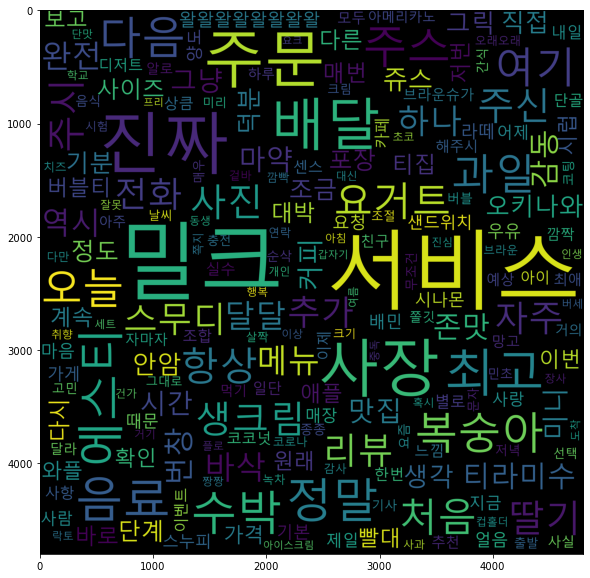

In [38]:
wc = WordCloud(font_path='malgun', width=1600, height=1600, scale=3.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(10, 10))
#plt.figure()
plt.imshow(gen)

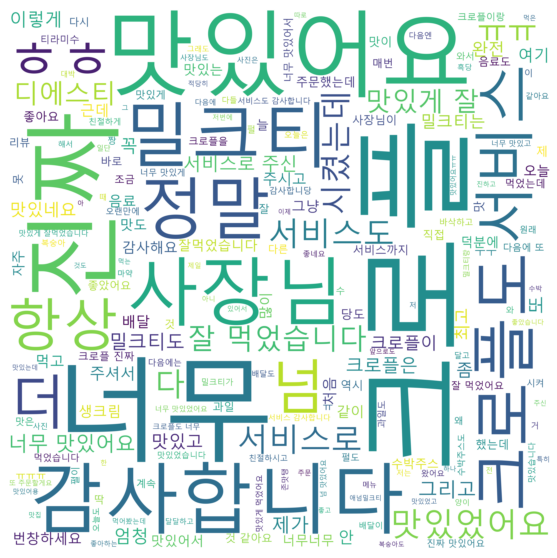

In [25]:
wc = WordCloud(font_path='malgun', width=1600, height=1600, max_font_size=350, background_color="white", scale=3).generate(results)
#gen = wc.generate_from_frequencies(c)
fig = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wc, interpolation='bilinear') # spline16
plt.show()

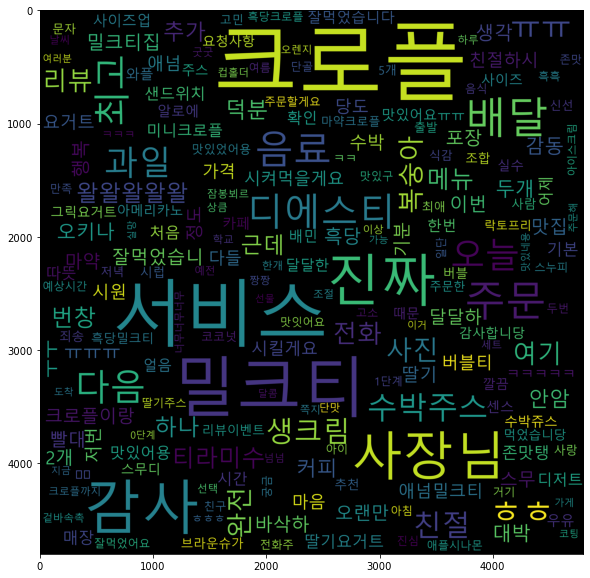

In [36]:
#fig = plt.figure(figsize=(10, 10))
wc = WordCloud(font_path='malgun', width=1600, height=1600, scale=3.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(10, 10))
#plt.figure()
plt.imshow(gen)